# Project 3 Fraud Detection Algorithm

## Load data and data split

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("vars_final_zscale-2.csv", index_col = 0)

In [37]:
data.shape

(980724, 18)

In [2]:
data.head()

,fraud_label,Days_fulladdress,fulladdress_30_count,fulladdress_7_count,ssn_30_count,Days_firstname_ssn,Days_fulladdress_homephone,fulladdresshomephone_30_count,ssnnamedob_30_count,ssn_14_count,fulladdresshomephone_14_count,namedob_14_count,firstnamessn_14_count,ssnnamedob_14_count,lastnamessn_14_count,fulladdresshomephone_7_count,homephone_14_count,homephone_1_count
record,,,,,,,,,,,,,,,,,,
19277,1,-3.230865,4.607631,5.073931,-0.099762,0.39406,-3.464852,5.758508,-0.097878,-0.072852,6.095677,-0.073782,-0.071503,-0.071056,-0.071466,6.416826,1.265044,-0.321508
19278,0,0.407271,-0.102765,-0.067384,-0.099762,0.39406,0.379935,-0.095718,-0.097878,-0.072852,-0.070587,-0.073782,-0.071503,-0.071056,-0.071466,-0.057622,2.981941,1.269795
19279,0,0.407271,-0.102765,-0.067384,-0.099762,0.39406,0.379935,-0.095718,-0.097878,-0.072852,-0.070587,-0.073782,-0.071503,-0.071056,-0.071466,-0.057622,-1.024153,-0.321508
19280,0,0.407271,-0.102765,-0.067384,-0.099762,0.39406,0.379935,-0.095718,-0.097878,-0.072852,-0.070587,-0.073782,-0.071503,-0.071056,-0.071466,-0.057622,-0.451854,-0.321508
19281,0,0.407271,-0.102765,-0.067384,-0.099762,0.39406,0.379935,-0.095718,-0.097878,-0.072852,-0.070587,-0.073782,-0.071503,-0.071056,-0.071466,-0.057622,-1.024153,-0.321508


In [3]:
# test for NAN
pd.isnull(data).any()

fraud_label                      False
Days_fulladdress                 False
fulladdress_30_count             False
fulladdress_7_count              False
ssn_30_count                     False
Days_firstname_ssn               False
Days_fulladdress_homephone       False
fulladdresshomephone_30_count    False
ssnnamedob_30_count              False
ssn_14_count                     False
fulladdresshomephone_14_count    False
namedob_14_count                 False
firstnamessn_14_count            False
ssnnamedob_14_count              False
lastnamessn_14_count             False
fulladdresshomephone_7_count     False
homephone_14_count               False
homephone_1_count                False
dtype: bool

In [4]:
# split data into out of date(after 11/1/10), train and test
oot_df = data.iloc[833508:,:]
trte_df = data.iloc[:833507,:]

In [5]:
train, test = train_test_split(trte_df, test_size=0.2, random_state=0)

In [6]:
oot_df.to_csv('oot.csv',index=True)
train.to_csv('train.csv',index=True)
test.to_csv('test.csv',index=True)

In [7]:
train.head()

,fraud_label,Days_fulladdress,fulladdress_30_count,fulladdress_7_count,ssn_30_count,Days_firstname_ssn,Days_fulladdress_homephone,fulladdresshomephone_30_count,ssnnamedob_30_count,ssn_14_count,fulladdresshomephone_14_count,namedob_14_count,firstnamessn_14_count,ssnnamedob_14_count,lastnamessn_14_count,fulladdresshomephone_7_count,homephone_14_count,homephone_1_count
record,,,,,,,,,,,,,,,,,,
551013,0,0.407271,-0.102765,-0.067384,-0.099762,0.394060,0.379935,-0.095718,-0.097878,-0.072852,-0.070587,-0.073782,-0.071503,-0.071056,-0.071466,-0.057622,-1.024153,-0.321508
693196,0,-1.086069,-0.102765,-0.067384,-0.099762,-1.143753,-1.198228,-0.095718,-0.097878,-0.072852,-0.070587,-0.073782,-0.071503,-0.071056,-0.071466,-0.057622,-1.024153,-0.321508
570219,0,0.407271,-0.102765,-0.067384,-0.099762,0.394060,0.379935,-0.095718,-0.097878,-0.072852,-0.070587,-0.073782,-0.071503,-0.071056,-0.071466,-0.057622,0.120445,-0.321508
216123,0,0.407271,-0.102765,-0.067384,-0.099762,0.394060,0.379935,-0.095718,-0.097878,-0.072852,-0.070587,-0.073782,-0.071503,-0.071056,-0.071466,-0.057622,-1.024153,-0.321508
284817,0,0.407271,-0.102765,-0.067384,-0.099762,0.394060,0.379935,-0.095718,-0.097878,-0.072852,-0.070587,-0.073782,-0.071503,-0.071056,-0.071466,-0.057622,-0.451854,-0.321508


In [8]:
train.describe()

,fraud_label,Days_fulladdress,fulladdress_30_count,fulladdress_7_count,ssn_30_count,Days_firstname_ssn,Days_fulladdress_homephone,fulladdresshomephone_30_count,ssnnamedob_30_count,ssn_14_count,fulladdresshomephone_14_count,namedob_14_count,firstnamessn_14_count,ssnnamedob_14_count,lastnamessn_14_count,fulladdresshomephone_7_count,homephone_14_count,homephone_1_count
count,666805.000000,666805.000000,666805.000000,666805.000000,666805.000000,666805.000000,666805.000000,666805.000000,666805.000000,666805.000000,666805.000000,666805.000000,666805.000000,666805.000000,666805.000000,666805.000000,666805.000000,666805.000000
mean,0.014375,0.026177,0.000864,0.001437,-0.002122,0.026545,0.024819,0.000430,-0.001930,-0.001938,0.000588,-0.001803,-0.001879,-0.001858,-0.001857,0.000474,-0.001849,-0.000820
std,0.119029,0.985440,1.008351,1.016095,0.972673,0.983547,0.984258,0.999780,0.974900,0.972329,1.001854,0.972889,0.972616,0.972634,0.972650,1.001941,0.997874,0.994287
min,0.000000,-3.250910,-0.102765,-0.067384,-0.099762,-3.373066,-3.486036,-0.095718,-0.097878,-0.072852,-0.070587,-0.073782,-0.071503,-0.071056,-0.071466,-0.057622,-1.024153,-0.321508
25%,0.000000,0.407271,-0.102765,-0.067384,-0.099762,0.394060,0.379935,-0.095718,-0.097878,-0.072852,-0.070587,-0.073782,-0.071503,-0.071056,-0.071466,-0.057622,-1.024153,-0.321508
50%,0.000000,0.407271,-0.102765,-0.067384,-0.099762,0.394060,0.379935,-0.095718,-0.097878,-0.072852,-0.070587,-0.073782,-0.071503,-0.071056,-0.071466,-0.057622,-0.451854,-0.321508
75%,0.000000,0.407271,-0.102765,-0.067384,-0.099762,0.394060,0.379935,-0.095718,-0.097878,-0.072852,-0.070587,-0.073782,-0.071503,-0.071056,-0.071466,-0.057622,0.692744,-0.321508
max,1.000000,0.407271,45.431061,49.631994,63.679049,0.394060,0.379935,54.543717,65.579850,68.486675,57.481213,68.945892,69.174366,69.209760,69.177156,60.370557,16.717120,44.234963


In [9]:
sum(train['fraud_label'])/len(train['fraud_label'])

0.01437451728766281

In [10]:
test.head()

,fraud_label,Days_fulladdress,fulladdress_30_count,fulladdress_7_count,ssn_30_count,Days_firstname_ssn,Days_fulladdress_homephone,fulladdresshomephone_30_count,ssnnamedob_30_count,ssn_14_count,fulladdresshomephone_14_count,namedob_14_count,firstnamessn_14_count,ssnnamedob_14_count,lastnamessn_14_count,fulladdresshomephone_7_count,homephone_14_count,homephone_1_count
record,,,,,,,,,,,,,,,,,,
128960,0,0.407271,-0.102765,-0.067384,-0.099762,0.394060,0.379935,-0.095718,-0.097878,-0.072852,-0.070587,-0.073782,-0.071503,-0.071056,-0.071466,-0.057622,0.692744,-0.321508
314906,0,0.407271,-0.102765,-0.067384,-0.099762,0.394060,0.379935,-0.095718,-0.097878,-0.072852,-0.070587,-0.073782,-0.071503,-0.071056,-0.071466,-0.057622,0.692744,1.269795
588307,0,0.407271,-0.102765,-0.067384,-0.099762,0.394060,0.379935,-0.095718,-0.097878,-0.072852,-0.070587,-0.073782,-0.071503,-0.071056,-0.071466,-0.057622,0.120445,1.269795
345421,0,0.407271,-0.102765,-0.067384,-0.099762,0.394060,0.379935,-0.095718,-0.097878,-0.072852,-0.070587,-0.073782,-0.071503,-0.071056,-0.071466,-0.057622,2.409642,-0.321508
593000,0,-1.426831,-0.102765,-0.067384,-0.099762,-1.494663,-1.558346,-0.095718,-0.097878,-0.072852,-0.070587,-0.073782,-0.071503,-0.071056,-0.071466,-0.057622,0.120445,-0.321508


In [11]:
test.describe()

,fraud_label,Days_fulladdress,fulladdress_30_count,fulladdress_7_count,ssn_30_count,Days_firstname_ssn,Days_fulladdress_homephone,fulladdresshomephone_30_count,ssnnamedob_30_count,ssn_14_count,fulladdresshomephone_14_count,namedob_14_count,firstnamessn_14_count,ssnnamedob_14_count,lastnamessn_14_count,fulladdresshomephone_7_count,homephone_14_count,homephone_1_count
count,166702.000000,166702.000000,166702.000000,166702.000000,166702.000000,166702.000000,166702.000000,166702.000000,166702.000000,166702.000000,166702.000000,166702.000000,166702.000000,166702.000000,166702.000000,166702.000000,166702.000000,166702.000000
mean,0.014745,0.028989,-0.002624,-0.002689,0.000489,0.028659,0.028532,-0.004142,-0.000027,0.000467,-0.003796,0.000267,0.000422,0.000251,0.000362,-0.003999,0.000971,0.000195
std,0.120530,0.982909,0.963664,0.956126,0.997508,0.982308,0.980028,0.942511,0.991478,0.995117,0.934752,0.994562,0.994575,0.994327,0.994489,0.922509,0.997750,0.965520
min,0.000000,-3.250910,-0.102765,-0.067384,-0.099762,-3.373066,-3.486036,-0.095718,-0.097878,-0.072852,-0.070587,-0.073782,-0.071503,-0.071056,-0.071466,-0.057622,-1.024153,-0.321508
25%,0.000000,0.407271,-0.102765,-0.067384,-0.099762,0.394060,0.379935,-0.095718,-0.097878,-0.072852,-0.070587,-0.073782,-0.071503,-0.071056,-0.071466,-0.057622,-1.024153,-0.321508
50%,0.000000,0.407271,-0.102765,-0.067384,-0.099762,0.394060,0.379935,-0.095718,-0.097878,-0.072852,-0.070587,-0.073782,-0.071503,-0.071056,-0.071466,-0.057622,-0.451854,-0.321508
75%,0.000000,0.407271,-0.102765,-0.067384,-0.099762,0.394060,0.379935,-0.095718,-0.097878,-0.072852,-0.070587,-0.073782,-0.071503,-0.071056,-0.071466,-0.057622,0.692744,-0.321508
max,1.000000,0.407271,40.720665,44.490679,57.880975,0.394060,0.379935,48.689492,59.609147,62.253990,51.314948,62.671377,62.879287,62.911504,62.881827,53.896109,15.000222,41.052358


In [12]:
sum(test['fraud_label'])/len(test['fraud_label'])

0.01474487408669362

## Build algorithm

In [13]:
# split lables and features
train_lab = train["fraud_label"]
train_fea = train.iloc[:,1:]

train_fea.head()

,Days_fulladdress,fulladdress_30_count,fulladdress_7_count,ssn_30_count,Days_firstname_ssn,Days_fulladdress_homephone,fulladdresshomephone_30_count,ssnnamedob_30_count,ssn_14_count,fulladdresshomephone_14_count,namedob_14_count,firstnamessn_14_count,ssnnamedob_14_count,lastnamessn_14_count,fulladdresshomephone_7_count,homephone_14_count,homephone_1_count
record,,,,,,,,,,,,,,,,,
551013,0.407271,-0.102765,-0.067384,-0.099762,0.394060,0.379935,-0.095718,-0.097878,-0.072852,-0.070587,-0.073782,-0.071503,-0.071056,-0.071466,-0.057622,-1.024153,-0.321508
693196,-1.086069,-0.102765,-0.067384,-0.099762,-1.143753,-1.198228,-0.095718,-0.097878,-0.072852,-0.070587,-0.073782,-0.071503,-0.071056,-0.071466,-0.057622,-1.024153,-0.321508
570219,0.407271,-0.102765,-0.067384,-0.099762,0.394060,0.379935,-0.095718,-0.097878,-0.072852,-0.070587,-0.073782,-0.071503,-0.071056,-0.071466,-0.057622,0.120445,-0.321508
216123,0.407271,-0.102765,-0.067384,-0.099762,0.394060,0.379935,-0.095718,-0.097878,-0.072852,-0.070587,-0.073782,-0.071503,-0.071056,-0.071466,-0.057622,-1.024153,-0.321508
284817,0.407271,-0.102765,-0.067384,-0.099762,0.394060,0.379935,-0.095718,-0.097878,-0.072852,-0.070587,-0.073782,-0.071503,-0.071056,-0.071466,-0.057622,-0.451854,-0.321508


In [14]:
test_lab = test["fraud_label"]
test_fea = test.iloc[:,1:]

test_fea.head()

,Days_fulladdress,fulladdress_30_count,fulladdress_7_count,ssn_30_count,Days_firstname_ssn,Days_fulladdress_homephone,fulladdresshomephone_30_count,ssnnamedob_30_count,ssn_14_count,fulladdresshomephone_14_count,namedob_14_count,firstnamessn_14_count,ssnnamedob_14_count,lastnamessn_14_count,fulladdresshomephone_7_count,homephone_14_count,homephone_1_count
record,,,,,,,,,,,,,,,,,
128960,0.407271,-0.102765,-0.067384,-0.099762,0.394060,0.379935,-0.095718,-0.097878,-0.072852,-0.070587,-0.073782,-0.071503,-0.071056,-0.071466,-0.057622,0.692744,-0.321508
314906,0.407271,-0.102765,-0.067384,-0.099762,0.394060,0.379935,-0.095718,-0.097878,-0.072852,-0.070587,-0.073782,-0.071503,-0.071056,-0.071466,-0.057622,0.692744,1.269795
588307,0.407271,-0.102765,-0.067384,-0.099762,0.394060,0.379935,-0.095718,-0.097878,-0.072852,-0.070587,-0.073782,-0.071503,-0.071056,-0.071466,-0.057622,0.120445,1.269795
345421,0.407271,-0.102765,-0.067384,-0.099762,0.394060,0.379935,-0.095718,-0.097878,-0.072852,-0.070587,-0.073782,-0.071503,-0.071056,-0.071466,-0.057622,2.409642,-0.321508
593000,-1.426831,-0.102765,-0.067384,-0.099762,-1.494663,-1.558346,-0.095718,-0.097878,-0.072852,-0.070587,-0.073782,-0.071503,-0.071056,-0.071466,-0.057622,0.120445,-0.321508


In [15]:
oot_lab = oot_df["fraud_label"]
oot_fea = oot_df.iloc[:,1:]

oot_fea.head()

,Days_fulladdress,fulladdress_30_count,fulladdress_7_count,ssn_30_count,Days_firstname_ssn,Days_fulladdress_homephone,fulladdresshomephone_30_count,ssnnamedob_30_count,ssn_14_count,fulladdresshomephone_14_count,namedob_14_count,firstnamessn_14_count,ssnnamedob_14_count,lastnamessn_14_count,fulladdresshomephone_7_count,homephone_14_count,homephone_1_count
record,,,,,,,,,,,,,,,,,
852785,0.407271,-0.102765,-0.067384,-0.099762,0.394060,0.379935,-0.095718,-0.097878,-0.072852,-0.070587,-0.073782,-0.071503,-0.071056,-0.071466,-0.057622,-1.024153,-0.321508
852786,0.407271,-0.102765,-0.067384,-0.099762,0.394060,0.379935,-0.095718,-0.097878,-0.072852,-0.070587,-0.073782,-0.071503,-0.071056,-0.071466,-0.057622,0.692744,-0.321508
852787,-2.890103,-0.102765,-0.067384,5.698312,-3.352424,-3.104734,-0.095718,5.872825,6.159833,-0.070587,6.200734,6.223576,6.227200,6.223864,-0.057622,-0.451854,-0.321508
852788,-1.476943,-0.102765,-0.067384,-0.099762,-1.546268,-1.611304,-0.095718,-0.097878,-0.072852,-0.070587,-0.073782,-0.071503,-0.071056,-0.071466,-0.057622,-1.024153,-0.321508
852789,-2.980305,1.467367,-0.067384,1.832930,-3.094402,-3.200060,1.855691,1.892356,-0.072852,-0.070587,-0.073782,-0.071503,-0.071056,-0.071466,-0.057622,0.120445,1.269795


In [16]:
# import neccessary packages
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

### Trial on Logistic Regression With All the Features

In [17]:
clf = LogisticRegression()

# train the classifier and fit the model
clf.fit(train_fea, train_lab)

# model evaluation: the mean accuracy on the given test data and labels
accuracy = clf.score(train_fea, train_lab)
print("accuracy:", accuracy)

accuracy: 0.9904004918979312


# Feature Selection based on Accuracy

In [18]:
accuracy = []
for i in range(1,train_fea.shape[1]):
    features_sub = train_fea.iloc[:,:i]
    clf = LogisticRegression()
    clf.fit(features_sub, train_lab)
    score = clf.score(features_sub, train_lab)
    accuracy.append(score)
    print(i, score)

print("")
print(len(accuracy))
print(max(accuracy))

1 0.9856254827123372
2 0.9883789113758895
3 0.9883789113758895
4 0.9899685815193348
5 0.9899670818305202
6 0.9899505852535598
7 0.9899580836976327
8 0.9904769760274743
9 0.9903375049677192
10 0.9904889735379908
11 0.9904904732268054
12 0.990481475093918
13 0.9904859741603618
14 0.9904889735379908
15 0.9904679778945868
16 0.9904514813176266

16
0.9904904732268054


Text(0, 0.5, 'Accuracy')

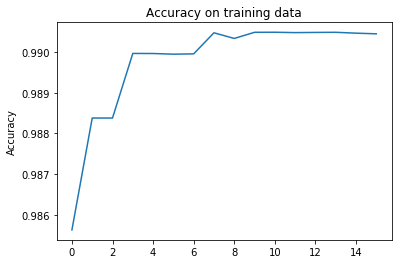

In [19]:
plt.plot(accuracy)
plt.title('Accuracy on training data')
plt.ylabel('Accuracy')

In [20]:
accuracy = []
for i in range(1,train_fea.shape[1]):
    features_sub = train_fea.iloc[:,:i]
    features_sub_test = test_fea.iloc[:,:i]
    clf = LogisticRegression()
    clf.fit(features_sub, train_lab)
    score = clf.score(features_sub_test, test_lab)
    accuracy.append(score)
    print(i, score)

print("")
print(len(accuracy))
print(max(accuracy))

1 0.9852551259133063
2 0.9879545536346295
3 0.9879545536346295
4 0.989640196278389
5 0.9896341975501194
6 0.9896102026370409
7 0.9896222000935802
8 0.990114095811688
9 0.9898621492243644
10 0.9901080970834183
11 0.990114095811688
12 0.990114095811688
13 0.9900960996268791
14 0.9900841021703399
15 0.990066105985531
16 0.9899941212462958

16
0.990114095811688


Text(0, 0.5, 'Accuracy')

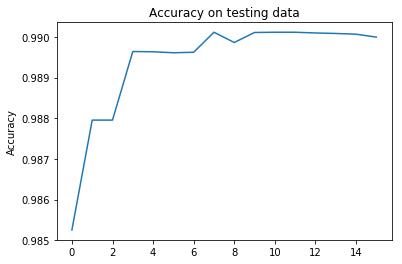

In [21]:
plt.plot(accuracy)
plt.title('Accuracy on testing data')
plt.ylabel('Accuracy')

In [22]:
accuracy = []
for i in range(1,train_fea.shape[1]):
    features_sub = train_fea.iloc[:,:i]
    features_sub_oot = oot_fea.iloc[:,:i]
    clf = LogisticRegression()
    clf.fit(features_sub, train_lab)
    score = clf.score(features_sub_oot, oot_lab)
    accuracy.append(score)
    print(i, score)

print("")
print(len(accuracy))
print(max(accuracy))

1 0.9856061841104228
2 0.9880176067818716
3 0.9880176067818716
4 0.989573144223454
5 0.9895663514835344
6 0.9895391805238561
7 0.9895255950440169
8 0.9901709053363765
9 0.9899535376589501
10 0.9901505271166178
11 0.9901573198565373
12 0.9901641125964569
13 0.9901573198565373
14 0.9901641125964569
15 0.9901029779371807
16 0.9900554287577438

16
0.9901709053363765


Text(0, 0.5, 'Accuracy')

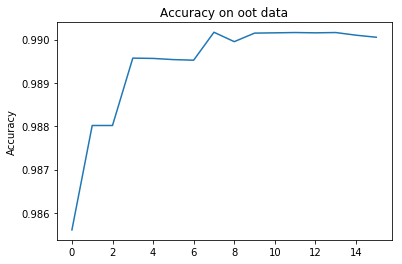

In [23]:
plt.plot(accuracy)
plt.title('Accuracy on oot data')
plt.ylabel('Accuracy')

# Feature Selection based on ROC_AUC

In [24]:
accuracy = []
for i in range(1,train_fea.shape[1]):
    features_sub = train_fea.iloc[:,:i]
    clf = LogisticRegression()
    clf.fit(features_sub, train_lab)
    predictions = clf.predict(features_sub)
    score = roc_auc_score(train_lab, predictions)
    accuracy.append(score)
    print(i, score)

print("")
print(len(accuracy))
print(max(accuracy))

1 0.5
2 0.6105790173519332
3 0.6105790173519332
4 0.671579599434154
5 0.6715274345932568
6 0.6714162578891564
7 0.6711630414872325
8 0.6872587221333177
9 0.6814821188383368
10 0.6877788489817777
11 0.6878310138226749
12 0.6873638125953684
13 0.6877773274212652
14 0.6877788489817777
15 0.6867401168453703
16 0.6871429807476798

16
0.6878310138226749


Text(0, 0.5, 'ROC_AUC_Score')

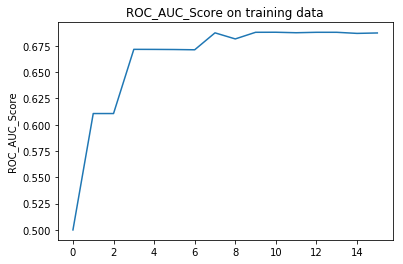

In [25]:
plt.plot(accuracy)
plt.title('ROC_AUC_Score on training data')
plt.ylabel('ROC_AUC_Score')

In [26]:
accuracy = []
for i in range(1,train_fea.shape[1]):
    features_sub = train_fea.iloc[:,:i]
    features_sub_test = test_fea.iloc[:,:i]
    clf = LogisticRegression()
    clf.fit(features_sub, train_lab)
    predictions = clf.predict(features_sub_test)
    score = roc_auc_score(test_lab, predictions)
    accuracy.append(score)
    print(i, score)

print("")
print(len(accuracy))
print(max(accuracy))

1 0.5
2 0.604161344800287
3 0.604161344800287
4 0.667132459398903
5 0.6669290419863725
6 0.6671172381427232
7 0.6665222071613115
8 0.6826013155049299
9 0.6734566646947647
10 0.6823978980923993
11 0.6824009423436352
12 0.6824009423436352
13 0.6825921827512219
14 0.6823857210874554
15 0.6813747225272749
16 0.6795348330607923

16
0.6826013155049299


Text(0, 0.5, 'ROC_AUC_Score')

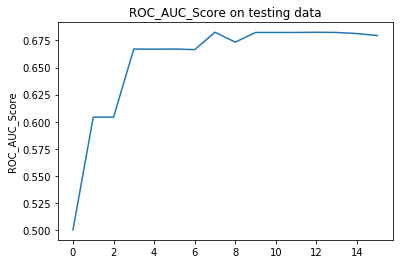

In [27]:
plt.plot(accuracy)
plt.title('ROC_AUC_Score on testing data')
plt.ylabel('ROC_AUC_Score')

In [28]:
accuracy = []
for i in range(1,train_fea.shape[1]):
    features_sub = train_fea.iloc[:,:i]
    features_sub_oot = oot_fea.iloc[:,:i]
    clf = LogisticRegression()
    clf.fit(features_sub, train_lab)
    predictions = clf.predict(features_sub_oot)
    score = roc_auc_score(oot_lab, predictions)
    accuracy.append(score)
    print(i, score)

print("")
print(len(accuracy))
print(max(accuracy))

1 0.5
2 0.6000419344865334
3 0.6000419344865334
4 0.6680277199016069
5 0.6677917595429472
6 0.6677779756604412
7 0.6666085117790221
8 0.6864670875833325
9 0.6782188129421213
10 0.68552669211932
11 0.68576265247798
12 0.6859986128366397
13 0.6862276812540463
14 0.6862311272246729
15 0.6838749696087019
16 0.6840833622023493

16
0.6864670875833325


Text(0, 0.5, 'ROC_AUC_Score')

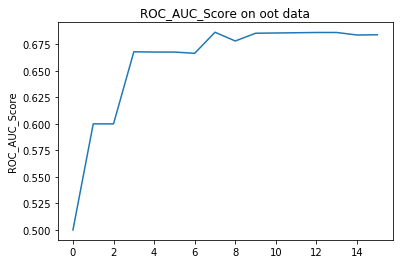

In [29]:
plt.plot(accuracy)
plt.title('ROC_AUC_Score on oot data')
plt.ylabel('ROC_AUC_Score')

# Feature Selection based on FDR

In [38]:
def multipltrun(a=10,v=17):
    '''
    This function run model on different samples based on user input:
    "a" (int) how many randome samples, default as 5
    "v" (int) how many variables, default as 6 (most important ones from backward selection)
    users can modify model based on different machine learning algorithm and its parameters
    
    FDR is calculated by first sorting outcome in descending order and cut off at 3%,
    sum number of fraud records on top 3% and divided by total fraud racords for that sample
    
    Final output would be a dataframe contains FDR at 3% for training set, testing set, and oot. 
    '''
    #declare dict
    FDRdict={"train":[],"test":[],"oot":[]}
    
    for i in range(a):        
        #split training and testing
        train, test = train_test_split(trte_df, test_size=0.2,random_state=i)
        
        # split lables and features and t
        train_lab = train["fraud_label"]
        train_fea = train.iloc[:,1:v+1]

        test_lab = test["fraud_label"]
        test_fea = test.iloc[:,1:v+1]

        oot_lab=oot_df["fraud_label"]
        oot_fea=oot_df.iloc[:,1:v+1]

        #define and fit model

        clf = LogisticRegression()
        clf.fit(train_fea, train_lab)
    
        #calculate FDR
        for sets in ["train","test","oot"]:
            fea=vars()[sets+'_fea'] 
            lab=vars()[sets+'_lab']
            prob=pd.DataFrame(clf.predict_proba(fea)) #modify based on your model
            result=pd.concat([pd.DataFrame(lab).reset_index(),prob],axis=1)
            topRows=int(round(len(result)*0.03))
            top3per=result.sort_values(by=1,ascending=False).head(topRows)
            FDR=sum(top3per.loc[:,'fraud_label'])/sum(result.loc[:,'fraud_label'])
            FDRdict[sets].append(FDR)
    
    #convert into dataframe
    FDR_df=pd.DataFrame(FDRdict)
   
    #add new row to calculate mean
    FDR_df.loc['mean']=FDR_df.mean()
    
    return FDR_df

In [39]:
multipltrun()

,train,test,oot
0,0.527908,0.517494,0.507315
1,0.516792,0.535080,0.502596
2,0.519533,0.529785,0.504483
3,0.522173,0.519470,0.504011
4,0.523435,0.526736,0.505427
5,0.520231,0.523176,0.504011
6,0.517536,0.531635,0.502596
7,0.526106,0.516567,0.505899
8,0.524704,0.526359,0.506843
9,0.522124,0.535685,0.506843


In [42]:
multipltrun(v=16)

,train,test,oot
0,0.511424,0.496338,0.489854
1,0.502222,0.519019,0.487022
2,0.504547,0.511618,0.487966
3,0.505660,0.502900,0.487022
4,0.506658,0.509976,0.489382
5,0.503655,0.505579,0.487494
6,0.503694,0.514790,0.487494
7,0.508178,0.500200,0.488438
8,0.506020,0.508925,0.489854
9,0.504217,0.520098,0.488910


In [43]:
def multipltrun_2(a=10,v=17):
    '''
    This function run model on different samples based on user input:
    "a" (int) how many randome samples, default as 5
    "v" (int) how many variables, default as 6 (most important ones from backward selection)
    users can modify model based on different machine learning algorithm and its parameters
    
    FDR is calculated by first sorting outcome in descending order and cut off at 3%,
    sum number of fraud records on top 3% and divided by total fraud racords for that sample
    
    Final output would be a dataframe contains FDR at 3% for training set, testing set, and oot. 
    '''
    #declare dict
    FDRdf_v=pd.DataFrame({"train":[],"test":[],"oot":[]})
    
    for j in range(1,v+1):
        FDRdict={"train":[],"test":[],"oot":[]}
        
        for i in range(a):
        #split training and testing
            train, test = train_test_split(trte_df, test_size=0.2,random_state=i)
        
            # split lables and features and t
            train_lab = train["fraud_label"]
            train_fea = train.iloc[:,1:j+1]

            test_lab = test["fraud_label"]
            test_fea = test.iloc[:,1:j+1]

            oot_lab=oot_df["fraud_label"]
            oot_fea=oot_df.iloc[:,1:j+1]

            #define and fit model

            clf = LogisticRegression()
            clf.fit(train_fea, train_lab)

            #calculate FDR
            for sets in ["train","test","oot"]:
                fea=vars()[sets+'_fea'] 
                lab=vars()[sets+'_lab']
                prob=pd.DataFrame(clf.predict_proba(fea)) 
                result=pd.concat([pd.DataFrame(lab).reset_index(),prob],axis=1)
                topRows=int(round(len(result)*0.03))
                top3per=result.sort_values(by=1,ascending=False).head(topRows)
                FDR=sum(top3per.loc[:,'fraud_label'])/sum(result.loc[:,'fraud_label'])
                FDRdict[sets].append(FDR)
    
    #convert into dataframe
        FDR_df=pd.DataFrame(FDRdict)
   
    #add new row to calculate mean
        # FDRdf_v.append(FDR_df.mean(),ignore_index=True)
    
        FDRdf_v.loc[j+1]=FDR_df.mean()
        
    return FDRdf_v

In [44]:
multipltrun_2()

,train,test,oot
2,0.355346,0.352088,0.326569
3,0.355668,0.352583,0.326569
4,0.352747,0.350432,0.327041
5,0.481882,0.484547,0.469089
6,0.481903,0.484547,0.468900
7,0.483318,0.484746,0.469042
8,0.495381,0.495768,0.482114
9,0.493543,0.495595,0.479000
10,0.498286,0.499665,0.479802
11,0.492064,0.493516,0.475696


In [45]:
multipltrun_2(v = 16)

,train,test,oot
2,0.355346,0.352088,0.326569
3,0.355668,0.352583,0.326569
4,0.352747,0.350432,0.327041
5,0.481882,0.484547,0.469089
6,0.481903,0.484547,0.468900
7,0.483318,0.484746,0.469042
8,0.495381,0.495768,0.482114
9,0.493543,0.495595,0.479000
10,0.498286,0.499665,0.479802
11,0.492064,0.493516,0.475696


In [51]:
multipltrun_df = multipltrun_2()

## According to the chart above, the optimal FDR for oot data is 0.375419, corresponding to 13 variables.

In [54]:
multipltrun_df.head()

,train,test,oot
2,0.355346,0.352088,0.326569
3,0.355668,0.352583,0.326569
4,0.352747,0.350432,0.327041
5,0.481882,0.484547,0.469089
6,0.481903,0.484547,0.468900


In [58]:
multipltrun_df = multipltrun_df.reset_index()

Text(0, 0.5, 'FDR')

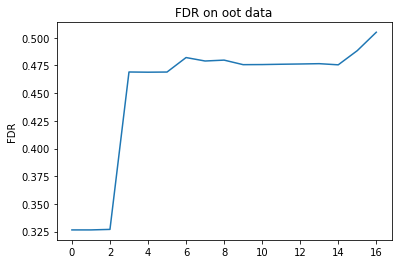

In [59]:
plt.plot(multipltrun_df['oot'])
plt.title('FDR on oot data')
plt.ylabel('FDR')

Conclusion: optimal # of variables is 17, the corresponding FDR is 0.504955.